In [2]:
from functions import *

62 62
500 500


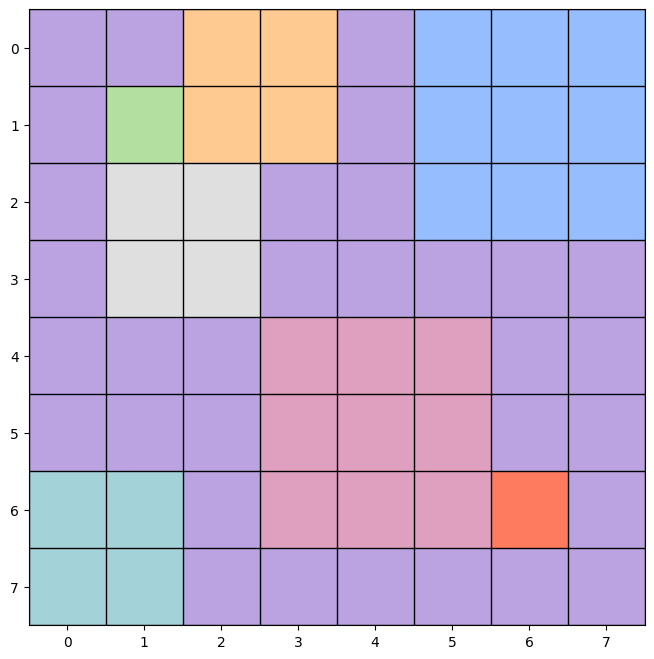

In [11]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/77.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

In [29]:
indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
print(indexed_matrix)

[[[3 0]
  [3 0]
  [7 0]
  [7 0]
  [3 0]
  [0 0]
  [0 0]
  [0 0]]

 [[3 0]
  [2 0]
  [7 0]
  [7 0]
  [3 0]
  [0 0]
  [0 0]
  [0 0]]

 [[3 0]
  [5 0]
  [5 0]
  [3 0]
  [3 0]
  [0 0]
  [0 0]
  [0 0]]

 [[3 0]
  [5 0]
  [5 0]
  [3 0]
  [3 0]
  [3 0]
  [3 0]
  [3 0]]

 [[3 0]
  [3 0]
  [3 0]
  [4 0]
  [4 0]
  [4 0]
  [3 0]
  [3 0]]

 [[3 0]
  [3 0]
  [3 0]
  [4 0]
  [4 0]
  [4 0]
  [3 0]
  [3 0]]

 [[1 0]
  [1 0]
  [3 0]
  [4 0]
  [4 0]
  [4 0]
  [6 0]
  [3 0]]

 [[1 0]
  [1 0]
  [3 0]
  [3 0]
  [3 0]
  [3 0]
  [3 0]
  [3 0]]]


In [38]:
queens = np.where(indexed_matrix[:, :, 1] == 1)

In [40]:
queens[0]

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [ ]:
def check_correctness(indexed_matrix):
    grid_size = indexed_matrix.shape[0]
    # Check if there are grid_size queens
    queens = np.where(indexed_matrix[:, :, 1] == 1)

    if queens[0].size != grid_size:
        return False
    # Check if there's a queen in each row
    if len(set(queens[0])) != grid_size:
        return False
    # Check if there's a queen in each column
    if len(set(queens[1])) != grid_size:
        return False
    # Check if there's a queen in 1-distance diagonal for each queen
    for i in range(grid_size):
        row, col = queens[0][i], queens[1][i]
        # Check the four possible diagonal neighbors at distance 1
        for dr, dc in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
            nr, nc = row + dr, col + dc
            if 0 <= nr < grid_size and 0 <= nc < grid_size and indexed_matrix[nr, nc, 1] == 1:
                return False  # Found a queen diagonally adjacent at distance 1
            
    # Check if each color region has at least one queen
    color_regions = {}
    
    for row in range(grid_size):
        for col in range(grid_size):
            color_index = indexed_matrix[row, col, 0]
            if color_index not in color_regions:
                color_regions[color_index] = 0
            if indexed_matrix[row, col, 1] == 1:
                color_regions[color_index] += 1
    
    # Each color region must have at least one queen
    if any(count == 0 for count in color_regions.values()):
        return False
    
    return True

In [42]:
check_correctness(indexed_matrix)

True

In [45]:
indexed_matrix_2 = indexed_matrix.copy()
indexed_matrix_2[0, 2, 1] = 1
indexed_matrix_2[0, 3, 1] = 0

In [46]:
check_correctness(indexed_matrix_2)

False

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_indexed_matrix(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    color_matrix = indexed_matrix[:, :, 0]  # Extract color indices
    
    # Create an RGB image
    rgb_image = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
    
    for row in range(grid_size):
        for col in range(grid_size):
            color_index = color_matrix[row, col]
            rgb_image[row, col] = color_dict.get(color_index, [255, 255, 255])  # Default to white if not in dict
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot the colored background
    ax.imshow(rgb_image)
    
    # Add symbols
    for row in range(grid_size):
        for col in range(grid_size):
            value = indexed_matrix[row, col, 1]
            if value == 1:  # Queen
                ax.text(col, row, '⚫', ha='center', va='center', fontsize=40, color='black')
            elif value == -1:  # Marked as X
                ax.text(col, row, 'X', ha='center', va='center', fontsize=30, color='black')

    # Set grid
    ax.set_xticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", size=0)
    
    plt.show()


In [49]:
indexed_matrix[0,0,1] = -1

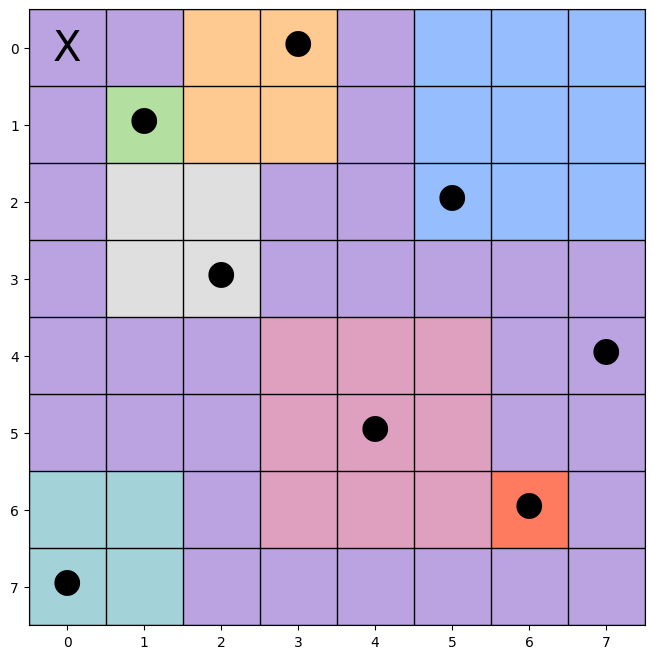

In [56]:
plot_indexed_matrix(indexed_matrix, color_dict)